finish 2022-02-25 14:01:00.618599
/data/keeling/a/yulanh/mydata/OT_modis/plot_output/hc_record_information_gpm_modis_1505_update_2018.txt
852
/data/keeling/a/yulanh/mydata/OT_modis/plot_output/hc_record_information_gpm_modis_1505_update_2019.txt
974
/data/keeling/a/yulanh/mydata/OT_modis/plot_output/hc_record_information_gpm_modis_1505_update_2020.txt
1191


<ipython-input-1-bb32a1c8331b>:239: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,


finish 2022-02-25 14:01:05.735511


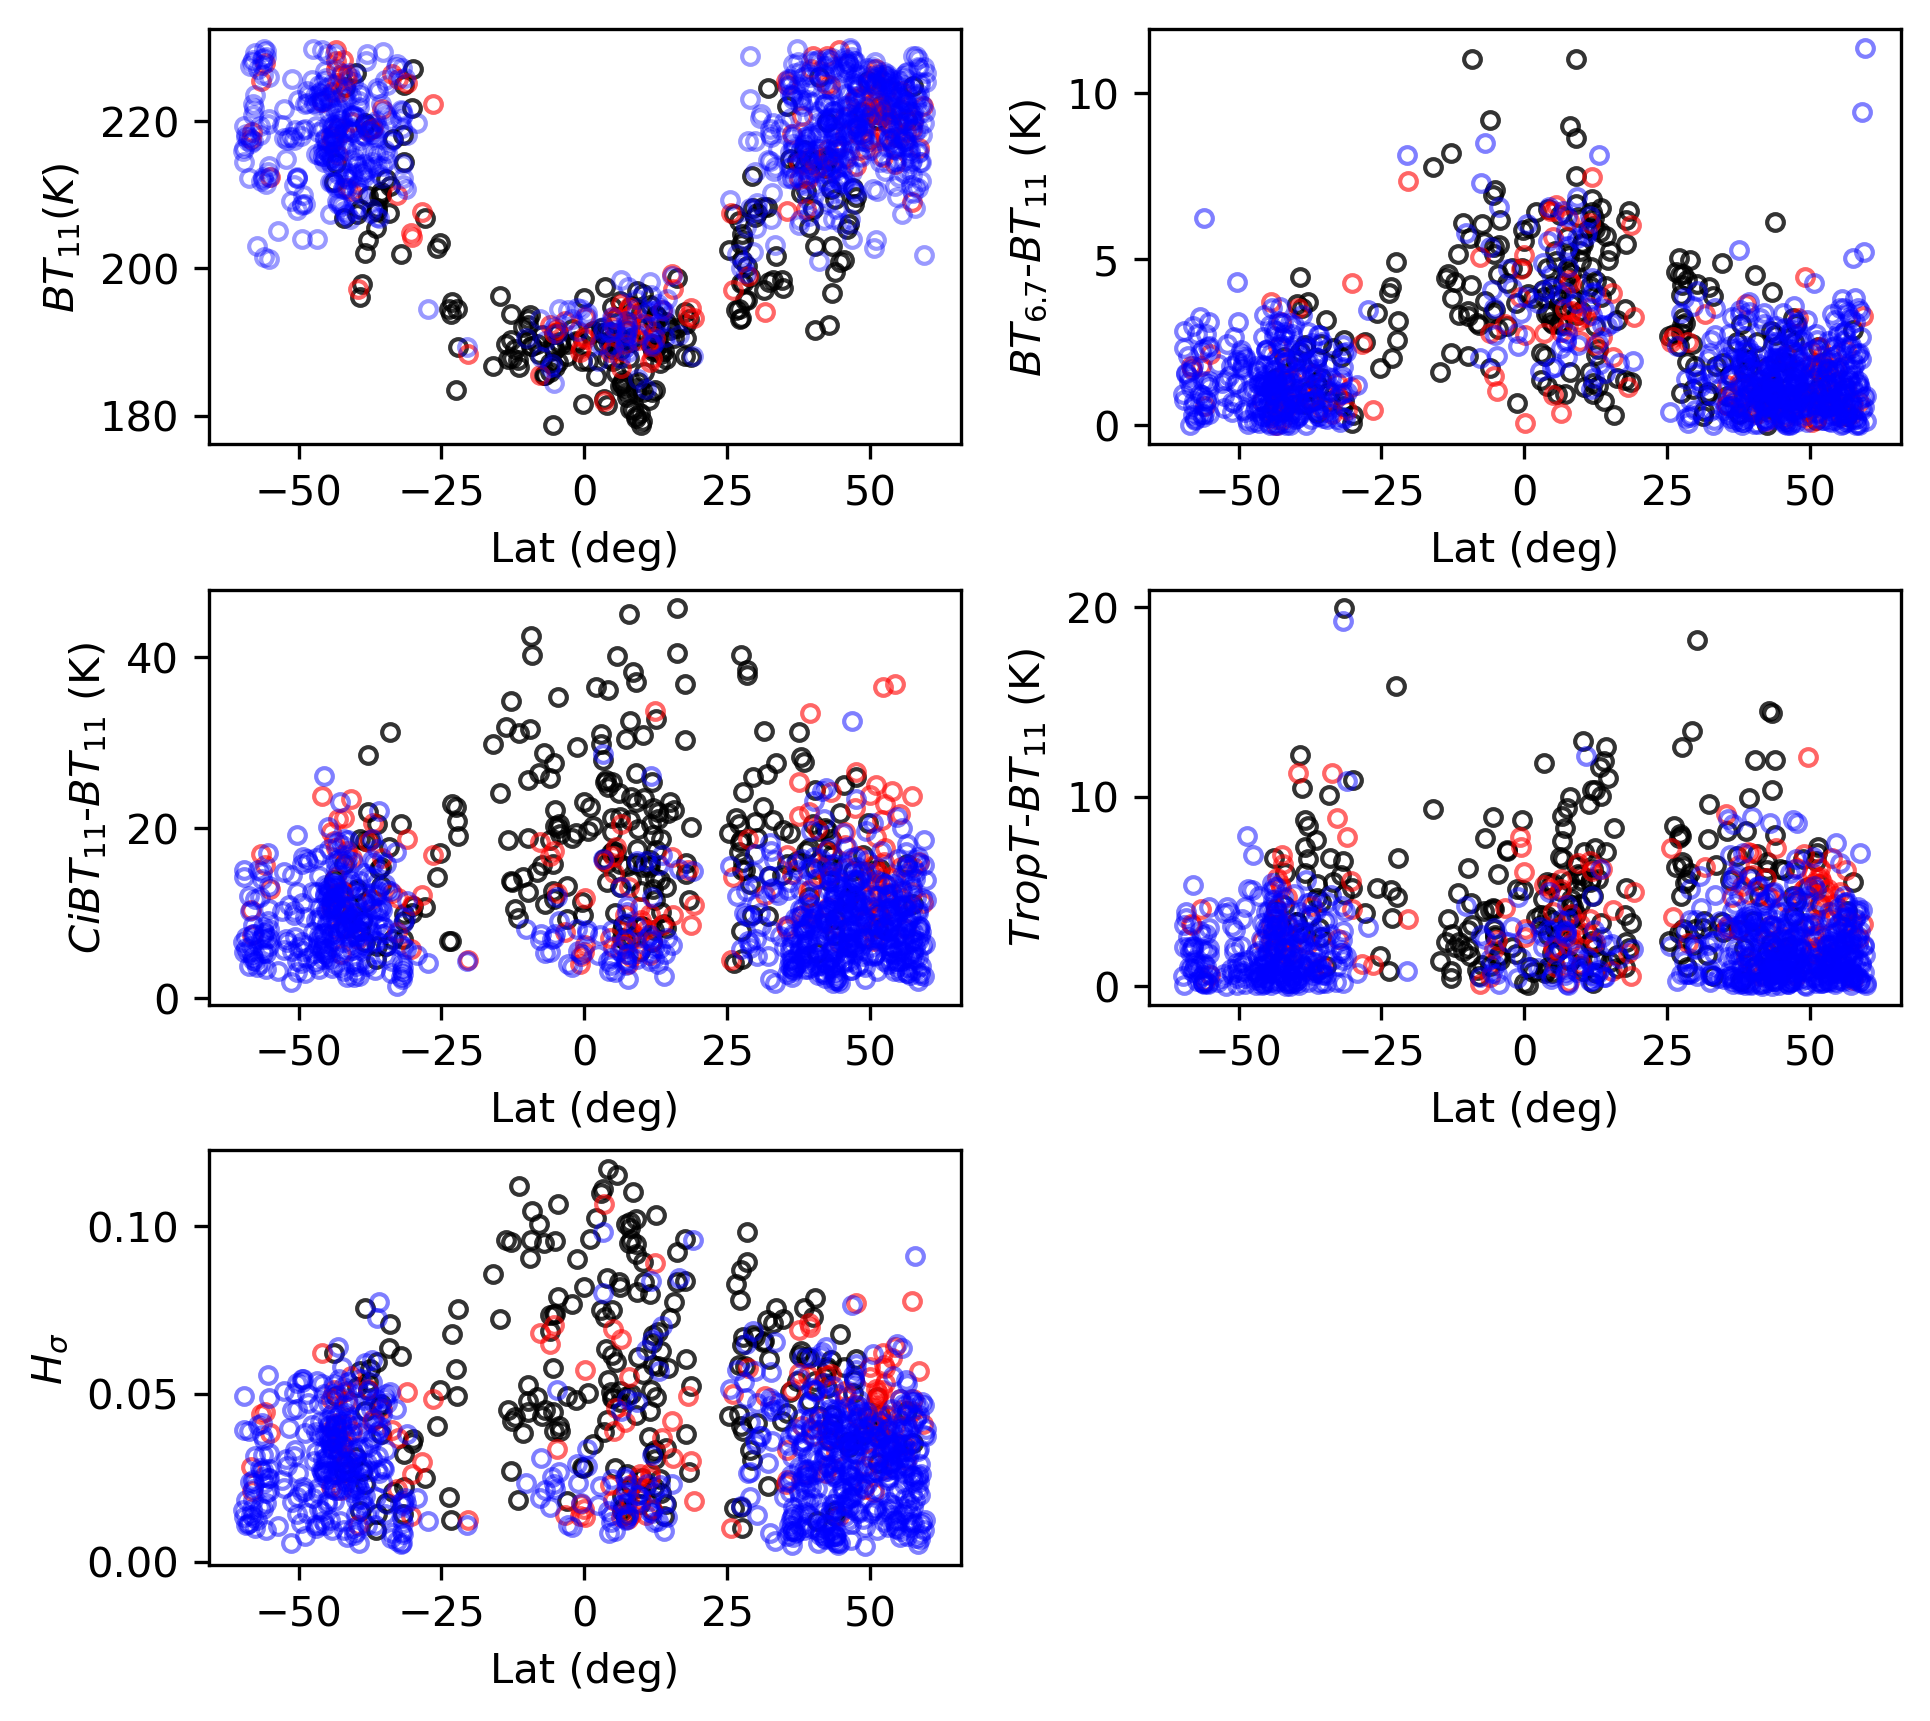

In [1]:

def read_text(fname):
    fo=open(fname,'r') #create file object
    #headstr=fo.readline()
    data=fo.readlines()
    #print (data)
    fo.close()  # close object
    return data

import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
import glob
from pyhdf.SD import SD, SDC
import h5py
import statsmodels.api as sm
from scipy import stats
from math import floor
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

print('finish',datetime.now())
fnames=glob.glob('/data/keeling/a/yulanh/mydata/OT_modis/plot_output/hc_record_information_gpm_modis_1505_update_20*')

Alllat_OT=np.zeros((1),'f')
All_aveBT11_OT=np.zeros((1),'f')
All_aveBT67_OT=np.zeros((1),'f')
All_minBT11_OT=np.zeros((1),'f')
All_minBT67_OT=np.zeros((1),'f')
All_trop_T_OT=np.zeros((1),'f')
All_hetero_OT=np.zeros((1),'f')
All_aveCiBT_OT=np.zeros((1),'f')

Alllat_NOT=np.zeros((1),'f')
All_aveBT11_NOT=np.zeros((1),'f')
All_aveBT67_NOT=np.zeros((1),'f')
All_minBT11_NOT=np.zeros((1),'f')
All_minBT67_NOT=np.zeros((1),'f')
All_trop_T_NOT=np.zeros((1),'f')
All_hetero_NOT=np.zeros((1),'f')
All_aveCiBT_NOT=np.zeros((1),'f')

Alllat_LOT=np.zeros((1),'f')
All_aveBT11_LOT=np.zeros((1),'f')
All_aveBT67_LOT=np.zeros((1),'f')
All_minBT11_LOT=np.zeros((1),'f')
All_minBT67_LOT=np.zeros((1),'f')
All_trop_T_LOT=np.zeros((1),'f')
All_hetero_LOT=np.zeros((1),'f')
All_aveCiBT_LOT=np.zeros((1),'f')

for fname in fnames:
    print(fname)
    data=read_text(fname)
    splitcol=data[0].split(' ')
    Ncol=len(splitcol)-splitcol.count('')
    Nrow=len(data)
    #rint(Ncol,Nrow)

    dataT=np.zeros((Nrow,Ncol-1),'f')

    colocated_fname = np.chararray(Nrow,itemsize=99)

    for i in range(Nrow):
        splitcol=data[i].split(' ')
        k=0
        for j in range(len(splitcol)):
            if (len(splitcol[j]) == 99):
                colocated_fname[i]=splitcol[j]
            
            if len(splitcol[j]) != 0 and splitcol[j] !='\n' and len(splitcol[j]) != 99:
                dataT[i,k]=float(splitcol[j])
                k=k+1
        

    GOTlon=dataT[:,0]
    GOTlat=dataT[:,1]
    OTflag=dataT[:,6] # a flag that from mannually check 0-NOT, 1-OT, 3-night time, 2-likely OT
    Proba =dataT[:,2]
    
    Totnum=GOTlon.shape
    Totnum=Totnum[0]
    print(Totnum)

    for fi in range(Totnum):

    # read the spatial data
        tpfname=colocated_fname[fi]
        #print(tpfname)
        data=read_text(tpfname)
        splitcol=data[0].split(' ')
        MODNcol=len(splitcol)-splitcol.count('')
        MODNrow=len(data)
        #print(MODNcol,MODNrow)
        # transfer data from string to float
        dataT=np.zeros((MODNrow,MODNcol),'f') 
        for i in range(MODNrow):
            splitcol=data[i].split(' ')
            #print(splitcol)
            k=0
            for j in range(len(splitcol)):
                if splitcol[j] != '' and splitcol[j] != '\n' :
                    dataT[i,k]=float(splitcol[j])
                    k=k+1
                
        MODlon=dataT[:,12] # modis lon&lat
        MODlat=dataT[:,13]
        MODprob=dataT[:,14]
        MODCBT11=dataT[:,16] # center
        MODaBT11=dataT[:,17] #average
        MODCBT67=dataT[:,18]
        MODaBT67=dataT[:,19]
        tropopause_T=dataT[:,20]
        MODciaBT=dataT[:,21] #ci ave BT
        MODciBT=dataT[:,22:30]
        OTedge = dataT[:,30:38]
        OTstd  =dataT[:,38]
        Cistd  =dataT[:,39]
        OTCistd  =dataT[:,40]
        
        
         #obtain the information of OT
        ind=np.where((GOTlon[fi] == MODlon) & (GOTlat[fi] == MODlat) & (Proba[fi] == MODprob))
        ind=ind[0]
        #print(tpfname,MODlon,ind,GOTlon[fi])
        tpciavebt=MODciaBT[ind]
        tpotavebt11=MODaBT11[ind]
        tpotminbt11=MODCBT11[ind]
        tpotavebt67=MODaBT67[ind]
        tpotminbt67=MODCBT67[ind]
        tptrop_T = tropopause_T[ind]
        tpciavebt11= MODciaBT[ind]
        
    
        tpotcistd=OTCistd[ind]
        #hetero_OT[fi]=tpotstd/tpotavebt
        #hetero_Ci[fi]=tpcistd/tpciavebt
        tphetero_OTCi=2*tpotcistd/(tpciavebt+tpotavebt11)
        # add information to array
        #print(OTflag[fi])
        if (OTflag[fi] == 1):
            Alllat_OT=np.append(Alllat_OT,GOTlat[fi])
            All_aveBT11_OT=np.append(All_aveBT11_OT,tpotavebt11)
            All_aveBT67_OT=np.append( All_aveBT67_OT,tpotavebt67)
            All_minBT11_OT=np.append( All_minBT11_OT,tpotminbt11)
            All_minBT67_OT=np.append( All_minBT67_OT,tpotminbt67)
            All_trop_T_OT=np.append( All_trop_T_OT,tptrop_T)
            All_hetero_OT=np.append( All_hetero_OT,tphetero_OTCi)
            All_aveCiBT_OT=np.append(All_aveCiBT_OT,tpciavebt11)

        if (OTflag[fi] == 0):
            Alllat_NOT=np.append(Alllat_NOT,GOTlat[fi])
            All_aveBT11_NOT=np.append(All_aveBT11_NOT,tpotavebt11)
            All_aveBT67_NOT=np.append(All_aveBT67_NOT,tpotavebt67)
            All_minBT11_NOT=np.append(All_minBT11_NOT,tpotminbt11)
            All_minBT67_NOT=np.append(All_minBT67_NOT,tpotminbt67)
            All_trop_T_NOT=np.append(All_trop_T_NOT,tptrop_T)
            All_hetero_NOT=np.append(All_hetero_NOT,tphetero_OTCi)
            All_aveCiBT_NOT=np.append(All_aveCiBT_NOT,tpciavebt11)
            
        if (OTflag[fi] == 2):
            Alllat_LOT=np.append(Alllat_LOT,GOTlat[fi])
            All_aveBT11_LOT=np.append( All_aveBT11_LOT,tpotavebt11)
            All_aveBT67_LOT=np.append( All_aveBT67_LOT,tpotavebt67)
            All_minBT11_LOT=np.append(All_minBT11_LOT,tpotminbt11)
            All_minBT67_LOT=np.append(All_minBT67_LOT,tpotminbt67)
            All_trop_T_LOT=np.append(All_trop_T_LOT,tptrop_T)
            All_hetero_LOT=np.append(All_hetero_LOT,tphetero_OTCi)    
            All_aveCiBT_LOT=np.append(All_aveCiBT_LOT,tpciavebt11)
            
LOT_num=Alllat_LOT.shape[0]
Alllat_LOT=Alllat_LOT[1:LOT_num]
All_aveBT11_LOT=All_aveBT11_LOT[1:LOT_num]
All_aveBT67_LOT=All_aveBT67_LOT[1:LOT_num]
All_minBT11_LOT=All_minBT11_LOT[1:LOT_num]
All_minBT67_LOT=All_minBT67_LOT[1:LOT_num]
All_trop_T_LOT=All_trop_T_LOT[1:LOT_num]
All_hetero_LOT=All_hetero_LOT[1:LOT_num]
All_aveCiBT_LOT= All_aveCiBT_LOT[1:LOT_num]

OT_num=Alllat_OT.shape[0]
Alllat_OT=Alllat_OT[1:OT_num]
All_aveBT11_OT=All_aveBT11_OT[1:OT_num]
All_aveBT67_OT=All_aveBT67_OT[1:OT_num]
All_minBT11_OT=All_minBT11_OT[1:OT_num]
All_minBT67_OT=All_minBT67_OT[1:OT_num]
All_trop_T_OT=All_trop_T_OT[1:OT_num]
All_hetero_OT=All_hetero_OT[1:OT_num]
All_aveCiBT_OT= All_aveCiBT_OT[1:OT_num]

NOT_num=Alllat_NOT.shape[0]
Alllat_NOT=Alllat_NOT[1:NOT_num]
All_aveBT11_NOT=All_aveBT11_NOT[1:NOT_num]
All_aveBT67_NOT=All_aveBT67_NOT[1:NOT_num]
All_minBT11_NOT=All_minBT11_NOT[1:NOT_num]
All_minBT67_NOT=All_minBT67_NOT[1:NOT_num]
All_trop_T_NOT=All_trop_T_NOT[1:NOT_num]
All_hetero_NOT=All_hetero_NOT[1:NOT_num]
All_aveCiBT_NOT= All_aveCiBT_NOT[1:NOT_num]

fig, ax =plt.subplots(3,2,figsize=[6,8],dpi=300,constrained_layout=True)

p00=ax[0,0].plot(Alllat_OT,All_minBT11_OT,'black',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.8)
p01=ax[0,0].plot(Alllat_LOT,All_minBT11_LOT,'red',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.6)
p02=ax[0,0].plot(Alllat_NOT,All_minBT11_NOT,'blue',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.4)
#ax[0,0].set_title('$BT_{11}$')
ax[0,0].set_ylabel('$BT_{11} (K)$')
ax[0,0].set_xlabel('Lat (deg)')

p00=ax[0,1].plot(Alllat_OT,All_aveBT67_OT-All_aveBT11_OT,'black',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.8)
p01=ax[0,1].plot(Alllat_LOT,All_aveBT67_LOT-All_aveBT11_LOT,'red',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.6)
p02=ax[0,1].plot(Alllat_NOT,All_aveBT67_NOT-All_aveBT11_NOT,'blue',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.5)
#ax[0,0].set_title('$BT_{11}$')
ax[0,1].set_ylabel('$BT_{6.7}$-$BT_{11}$ (K)')
ax[0,1].set_xlabel('Lat (deg)')

p00=ax[1,0].plot(Alllat_OT,All_aveCiBT_OT-All_minBT11_OT,'black',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.8)
p01=ax[1,0].plot(Alllat_LOT,All_aveCiBT_LOT-All_minBT11_LOT,'red',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.6)
p02=ax[1,0].plot(Alllat_NOT,All_aveCiBT_NOT-All_minBT11_NOT,'blue',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.5)
#ax[0,0].set_title('$BT_{11}$')
ax[1,0].set_ylabel('$Ci BT_{11}$-$BT_{11}$ (K)')
ax[1,0].set_xlabel('Lat (deg)')

p00=ax[1,1].plot(Alllat_OT,All_trop_T_OT-All_minBT11_OT,'black',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.8)
p01=ax[1,1].plot(Alllat_LOT,All_trop_T_LOT-All_minBT11_LOT,'red',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.6)
p02=ax[1,1].plot(Alllat_NOT,All_trop_T_NOT-All_minBT11_NOT,'blue',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.5)
#ax[0,0].set_title('$BT_{11}$')
ax[1,1].set_ylabel('$Trop T$-$BT_{11}$ (K)')
ax[1,1].set_xlabel('Lat (deg)')

p00=ax[2,0].plot(Alllat_OT,All_hetero_OT,'black',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.8)
p01=ax[2,0].plot(Alllat_LOT,All_hetero_LOT,'red',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.6)
p02=ax[2,0].plot(Alllat_NOT,All_hetero_NOT,'blue',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.5)
#ax[0,0].set_title('$BT_{11}$')
ax[2,0].set_ylabel('$H_\sigma$')
ax[2,0].set_xlabel('Lat (deg)')

fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,
                    wspace=0.25, hspace=0.35)
#p00.legend(['OT','LOT','NOT'],loc=2,fontsize=15)
fig.delaxes(ax[2,1])
print('finish',datetime.now())






In [31]:
print(Alllat_OT.shape)
print(NOT_num, OT_num, LOT_num,NOT_num+ OT_num+ LOT_num)

(238,)
768 239 154 1161
